# 앙상블 방법 : Ensemble Method

* 기본 개념 : 단일한 모델을 사용해서 결과를 얻고자 하는 것이 아니라 여러가지 모델을 생성하고, 이들을 종합적으로 활용해서 판단을 하겠다는 의미임!!!  
간단하게 말해서 팀플레이 & 다수의 법칙 등이 데이터 분석에 적용된 것이라고 대략적으로 비유할 수 있음!  
but 그에 상응하는 대가는 직관적이지 않고, 해석하기가 쉽지 않음...(즉, 그냥 대다수가 그렇다고 해요..이유는 몰라요...)  성능이 좋아지네요!!!

* 차원의 저주 등으로 파라미터의 수가 많아서 학습 시간이 오래 걸리고, 최적해를 찾는 것이 쉽지 않은 경우가 있다. 또한 과적합 문제도 생성될 수 있음.  
즉, 차원의 저주(많은 파라미터로 인한 데이터 수 부족)로 일반화오차가 증가하는 현상이 있음. 대도록이면 간단하고, 다양한(차별성이 있는) 모델들을 결합하여 보다 좋은 성능을 보이고 싶은 것!

* 참고)동일한 알고리즘이지만, 서로 다른 파라미터를 가진 것을 각기 다른 분류기라고 할 것임!    

* 크게 2가지 방법  
1) 학습 알고리즘 다양화:동일한 데이터에 대해서 knn, svm  등 서로 다른 분류기를 결합하는 방식. 실질적으로 동일한 knn, svm 이여도 사용하는 파리미터 세팅에 의해서 결과 값들이 다양하게 나타날 수 있기 때문에 동일한 알고리즘&다양한 파라미터, (다양한 알고리즘&다양한 파라미터)들의 조합들을 다시 하는 경우 등이 있음.   
2) 학습 데이터를 다양화: 동일한 모델을 사용하지만, 데이터를 여러개 만들어서 사용하는 경우. 즉, 동일한 신경망 모델을 사용하지만, 전체 학습 데이터를 적절히 조합하거나 랜덤으로 생성하면서 서로다른 학습데이터 셋을 만들어서 이를 학습에 활용하는 경우. 즉, 데이터 셋이 여러개가 되었기 때문에 동일한 분류기에 대해서 여러가지 결과치들이 나타나게 됨.  
- 제일 간단한 방식이 되겠음.(알고리즘보다는 데이터 생성하는 방식이 보다 쉬우니)

* 결합 방식  
1) 병렬적 결합 : 각각의 분류기의 결과를 한 번에 모두 고려하여 하나의 최종 결과 도출.(모든 사람들의 의견 반영하여 선정)  
2) 순차적 결합 : 각각의 분류기의 결과를 단계별로 나누어서, 앞 단계 배치된 알고리즘의 결과가 뒤의 분류기의 학습과 결과에 영향을 미친다.(전문가들의 의견을 먼저 수집하고, 일반 개인들의 의견 수집하는 방식?)  

* 세부 구분  
1) 필터링 사용 : 하나의 분류기를 학습할 때마다 새로운 데이터를 생성하고, 바로 학습에 적용하기에 이전에 학습이 끝난 분류기들을 이용하여 필터링하여, 미리 ??  
2) 리샘플링 사용 : 학습 데이터를 매번 새롭게 생성하는 것 대신에, 주어진 전체 학습데이터에서 일부 부분집합을 추출하여 각 분류기들을 학습한다. 가장 단순한 샘플링 방법을 사용하는 "배깅"이 있으며, 이후 분류가 어려운 샘플들이 보다 자주 선택될 수 있도록 하는 샘플링 기법을 적용한 "MadaBoost" 도 있음.  
3) 가중치 조절 : 모든 분류기에 대해서 같은 학습 데이터를 사용하되, 각 데이터에 가중치를 주어 학습에 대한 영향도를 달리하며, 가장 유명한 AdaBoost 가 여기에 속함.

이제 보다 사람들이 위의 내용들에 대해 정리하고, 이름을 부여한 것들을 중심으로 알아보자!  
크게 Bagging / Boosting / Stacking

## Bagging

* Bagging : Bootstrap Aggregation  
학습 데이터에 대해서 sampling을 한다는 것이고, 이것은 최대한 Random 하게 해야한다.  
중요한 것은 전체 데이터에 대해서 일부분들을 Random하게 추출하는 sampling  이다.  
그리고 이러한 것을 바탕으로 각기 샘플된 데이터를 기반으로 분류기를 학습한다.  


# Voting Ensemble
* https://mlwave.com/kaggle-ensembling-guide/

* [ 상황 ] 우선 분류를 하는 학습기 A,B,C가 존재하고, 이들은 각기 70%의 정확도를 보이고 있다.  
이러한 상황에서 이들을 모두 사용해서 다수결의 법칙으로 결정하고자 한다.  


In [2]:
#01) 3개의 분류기가 모두 다 맞출 확률 : 
case1 = 0.7*0.7*0.7
print (case1)

0.3429999999999999


In [3]:
# 02 ) 2개의 분류기가 맞추고, 1개가 틀릴 확률:
case2 = 0.7*0.7*0.3 + 0.7*0.3*0.7+0.3*0.7*0.7
print (case2)

0.44099999999999995


In [4]:
# 03) 1개의 분류기가 맞추고, 2개가 틀릴 확률:
case3 = 0.3*0.3 * 0.7 + 0.7*0.3*0.3 + 0.3 *0.7 *0.3
print (case3)

0.189


In [5]:
# 04) 3개의 분류기 모두 틀리는 확률:
case4 = 0.3*0.3*0.3
print (case4)

0.027


In [6]:
# 모든 경우가 위의 4가지의 경우로 분할이 된다.!!!
print (case1 + case2 + case3 + case4)

0.9999999999999999


* 위의 경우에서 살펴보면 다수결의 법칙(3개이니, 2개 이상이 맞는 경우)으로 생각을 하면 case1 + case2 가 되어서 0.784로 1개의 부류기의 0.7보다 높은 정확도를 보이는 것을 알 수 있다!!!!

In [7]:
print( case1 + case2)

0.7839999999999998


* 위의 경우에서는 70%의 정확도를 가지는 것을 3가지를 사용을 하였으나, 이것을 5개를 사용해서 처리하게 된다면 5개 모두 맞는 경우 + 4개 맞는 경우 + 3개 맞는 경우를 계산하면 된다. ---> 약 0.83% 로 향상이 됨!!!!!

In [1]:
import itertools
import numpy as np

In [9]:
# 조합에서는 모든 가능한 경우를 하고, 유니크한 경우를 추출하지 않아서 관련 함수를 만들어야 한다.
def get_uniq_row(arr1):
    y = np.ascontiguousarray(arr1).view(np.dtype((np.void, arr1.dtype.itemsize * arr1.shape[1])))
    # _ 는 그 위치에 해당하는 값을 무시하고 싶을 때!!!!!!!!!
    _,idx = np.unique(y, return_index=True)

    unique_result = arr1[idx]
    return unique_result

def multiple_values(arr1):
    temp = 0 # 최종 더하는 변수
    for i in arr1:
        temp1 = 1 # 각 경우마다의 원소의 곱을 처리하는 변수
        for j in i:
            temp1 *= j
        temp += temp1
    return temp

In [12]:
0.7*0.7*0.7*0.7*0.7

0.16806999999999994

In [10]:
# 모두 다 같은 경우
mylist = [0.7,0.7,0.7,0.7,0.7]
case1_list = [] # 곱으로 할 것이니!!!
for i in itertools.permutations(mylist, 5):
    case1_list.append(i)
case1_uniq = get_uniq_row(np.array(case1_list))
print (case1_uniq)
case1 = multiple_values(case1_uniq)
print (case1)

[[0.7 0.7 0.7 0.7 0.7]]
0.16806999999999994


In [4]:
# 4개 맞추고, 1개 틀리는 경우
mylist = [0.3,0.7,0.7,0.7,0.7]
case2_list = [] # 곱으로 할 것이니!!!
for i in itertools.permutations(mylist, 5):
    case2_list.append(i)
case2_uniq = get_uniq_row(np.array(case2_list))
print (case2_uniq)
case2 = multiple_values(case2_uniq)
print (case2)

[[0.3 0.7 0.7 0.7 0.7]
 [0.7 0.3 0.7 0.7 0.7]
 [0.7 0.7 0.3 0.7 0.7]
 [0.7 0.7 0.7 0.3 0.7]
 [0.7 0.7 0.7 0.7 0.3]]
0.3601499999999999


In [5]:
# 3개 맞고, 2개 틀리는 경우 
mylist = [0.3,0.3,0.7,0.7,0.7]
case3_list = [] # 곱으로 할 것이니!!!
for i in itertools.permutations(mylist, 5):
    case3_list.append(i)
case3_uniq = get_uniq_row(np.array(case3_list))
print (case3_uniq)
case3 = multiple_values(case3_uniq)
print (case3)

[[0.3 0.3 0.7 0.7 0.7]
 [0.3 0.7 0.3 0.7 0.7]
 [0.3 0.7 0.7 0.3 0.7]
 [0.3 0.7 0.7 0.7 0.3]
 [0.7 0.3 0.3 0.7 0.7]
 [0.7 0.3 0.7 0.3 0.7]
 [0.7 0.3 0.7 0.7 0.3]
 [0.7 0.7 0.3 0.3 0.7]
 [0.7 0.7 0.3 0.7 0.3]
 [0.7 0.7 0.7 0.3 0.3]]
0.3087


In [6]:
# 5개의 경우에는 83까지 향상이 됨!!!!
print (case1 + case2 + case3)

0.8369199999999999


# 그러면 어떠한 것들을 가지고 구성을 해야 좋을까? 초록이 동색? 아니면 다양한 의견을 가진 사람들을 모아서 하는 다양성의 관점??  
--> 일반적으로 상관관계가 적은 것들을 모아야지, 잘못된 것들의 수정가능성이 커진다. 같은 것들은 다 같이 오류를발생하고, 잘못된 것을 수정될 기회가 없기 떄문에..

* case1) 유사한 것들로 구성  

1 1 1 1 1 1 1 1 1 1  # 오리지널  

1 1 1 1 1 1 1 1 0 0  # 80퍼센트  
1 1 1 1 1 1 1 1 0 0 # 80퍼센트  
1 0 1 1 1 1 1 1 0 0 # 70처센트  


---> 위의 것으로 다수결 수행 시  
1 1 1 1 1 1 1 1 0 0 # 여전히 80퍼센트로 오류가 수정이 안 됨!!!!!

In [17]:
a= np.array([1,1,1,1,1,1,1,1,1,1])
b= np.array([1,1,1,1,1,1,1,1,0,0])
c= np.array([1,1,1,1,1,1,1,1,0,0])
d= np.array([1,0,1,1,1,1,1,1,0,0])

# 위와 같이 하면 a 의 변화가 없으니 nan 이 나타나게 된다.
# ref)https://stackoverflow.com/questions/7653993/encountered-invalid-value-when-i-use-pearsonr
print (np.corrcoef(c,d))
print (np.corrcoef(a,b))

[[1.         0.76376262]
 [0.76376262 1.        ]]
[[nan nan]
 [nan  1.]]


/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


* 위와 같은 경우에는 t_test를 사용하는 것도 괜찮음!

In [18]:
from scipy import stats

In [20]:
print (stats.ttest_ind(a, b))
print (stats.ttest_ind(a, d))
print (stats.ttest_ind(b,c))
print (stats.ttest_ind(b,d))


Ttest_indResult(statistic=1.4999999999999998, pvalue=0.1509504521842674)
Ttest_indResult(statistic=1.9639610121239317, pvalue=0.06516948808048838)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.49319696191607226, pvalue=0.6278365031702049)


# 위의 경우에서보면 "다수의 법칙"은 분류의 경우가 다양하게 많은 문제에서 보다 적합하다.

* 그러면 의사결정에서 모든 사람들이 동등하게 1표를 행사하는 경우도 있지만, 전문가나 의사 결정권이 높거나 잘 하는 사람들에게 가중치를 주는 경우도 있고, 아니면 스포츠에서처럼 최고점/최저점 등에서 처리를 하여서 극단의 값을 제외하고 처리하는 등 여러가지 방법이 있다.  
여기서는 위에서와 달리 모든 사람이 1표 행사가 아닌 경우를 살펴보고자 한다.

* 아래 결과를 보면 여러가지의 분류기들을 하고, 이를 가지고 투표앙상블을 수행을 하는데, 모두 1표씩 하는 경우하고, 가중치를 두고 하는 경우하고 서로 다른 결과들을 보이는 것을 볼 수 있다. 그리고 이러한 것은 경진대회에서는 다만 얼마라도 향상시키기 위해서 사용하는 방법 중 하나가 되겠다!!!

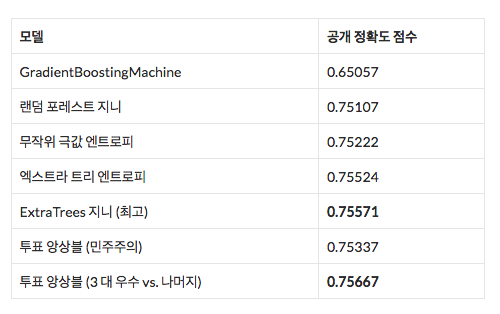

In [168]:
img_path = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/20_ensemble/ref/ref_img_01.png"
from IPython.display import Image
Image(filename=img_path) 

#  참고)  위에서 RF하고 Extra Trees 하고 2가지가 있는데 이 둘은 무엇이 다를까?   
* ref) https://www.reddit.com/r/MachineLearning/comments/29uwi1/why_are_extremely_randomized_trees_more_efficient/  
* ref) http://www.montefiore.ulg.ac.be/~ernst/uploads/news/id63/extremely-randomized-trees.pdf.  

위의 사항들을 참고를 하면, 일반적인 RF 보다는 내부적으로 ensemble을 이용하여 보다  스무스하게 처리를 하는 Extra Trees Classifie  가 보다 조금 더 성능이 좋은 것을 나타내고 있다!!!

# 그리고 시계열 등이나 다른 경우에 있어서 "평균"을 이용하는 경우도 많음. 평균을 통해서 편차를 줄일 수 있기 때문에...

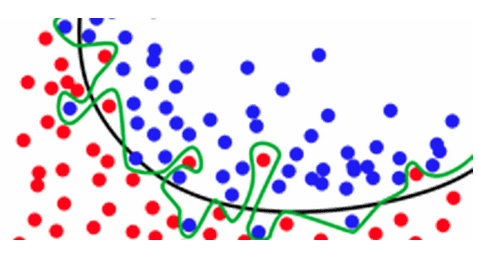

In [169]:
img_path = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/20_ensemble/ref/ref_img_02.png"
from IPython.display import Image
Image(filename=img_path)

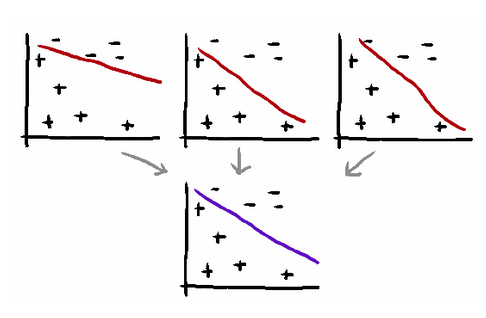

In [170]:
img_path = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/20_ensemble/ref/ref_img_03.png"
from IPython.display import Image
Image(filename=img_path)

* Competitions are effective because there are any number of techniques that can be applied to any modeling problem, but we can’t know in advance which will be most effective. Anthony Goldbloom Data Prediction Competitions — Far More than Just a Bit of Fun

# 위의 경우처럼 voting  으로 성능을 끌어올리는 경우도 있지만, 유일한 방법은 아님!!!!  
# 그럼???

## suggestion : Stacked Generalization & Blending  
* ref) https://gormanalysis.com/guide-to-model-stacking-i-e-meta-ensembling/

* stacking : Meta Ensembling 이라고도 불리는 것으로 여러 예측 모델의 정보를 조합하여 새로운 예측 모델을 생성하는 "Model Ensemble" 방법임.   
1계층 모델의 결과물을 고루 섞에서 특정 모델의 강점을 부각하고, 특정 모델의 약점을 보완하는 Stacking 모델(2계층 모델이라고도 불리움)은 대부분의 경우 단일 1계층 보델보다 좋은 성능을 보이고 있다. 그리고 조합하는 1계층의 모델들이 서로 다른 경우에(상관도가 작은 것들이) 가장 큰 효과를 얻을 수 있음.  
* 실제에서 사용을 하느냐? 대회 용으로는 사용을 하지만, 실제에서는 어느 정도 이상의 성능이 나온 다음에는 잘 사용을 안하고, 너무 성능이 안 나와서 이를 시도할 수는 있으나, 기본적으로 다만 얼마만이라도 상승을 바랄 때 사용을 하게 된다.

### 큰 흐름  
1. 전체 데이터에 대한 개별 알고리즘을 선택하고, 각기 알고리즘의 특성에 맞게 변수 선정 및 튜닝 수행 : 여기서는 knn, svm 으로 선택하였음
2. 우선 각기 알고리즘에서 CV를 이용한 방법으로 최적의 파라미터를 가지는 알고리즘을 찾는다. : knn에서 최적화된 파라미터, ssvm 에서 최적화된 파라미터
3. 각기 알고리즘에서 최적화된 상태로 train 데이터에 대해서 각기 예측하는 값을 train 데이터에 특징으로 추가한다.
4. test에 대해서도 위에서 수행한 것과 마찬가지로 각기 알고리즘으로 예측되는 값을 특징으로 추가한다.
5. train 에서 각기 알고리즘으로 예측되는 값들의 특징만 가지고 하던가, 아니면 기존의 특징을 추가해서 하던가 이는 사용자의 선택으로, 중요한 것은 개별 알고리즘의 결과 값을 "특징"으로 추가를 해서 로지스틱이나 다른 알고리즘을 통해서 다시 한 번 결과값을 예측한다. 그리고 선택한 알고리즘에 대한 최적화 수행.(여기서 로지스특이나 이런 것으로 할 수 도 있고, 많은 사람이 선택한 것-다수결, 가중치 등의 방법을 사용할 수 있다.)
6. test에서 위에서 수행한 knn, svm의 결과값을 먼저 다시 가지고, 다시 한 번 모델들로 최적화한 컬럼들을 이용하여 종합적인 선택을 한다.


In [21]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pylab as plt

import time

In [22]:
train_path = "data/01_stack_example_dart/train.csv"
test_path = "data/01_stack_example_dart/test.csv"
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [23]:
train.head()

,ID,XCoord,YCoord,Competitor
0,111,0.943354,-0.184819,Bob
1,92,0.121557,-0.927656,Bob
2,20,0.818485,0.375437,Bob
3,75,0.867462,-0.159851,Sue
4,10,-0.817321,-0.373419,Kate


In [24]:
target_list = train["Competitor"].unique()
target_list

array(['Bob', 'Sue', 'Kate', 'Mark'], dtype=object)

In [25]:
test.head()

,ID,XCoord,YCoord,Competitor
0,6,0.064729,0.356983,Mark
1,12,-0.766731,-0.255876,Sue
2,22,0.182282,-0.540976,Mark
3,34,-0.908910,0.223945,Bob
4,47,0.992230,-0.085550,Bob


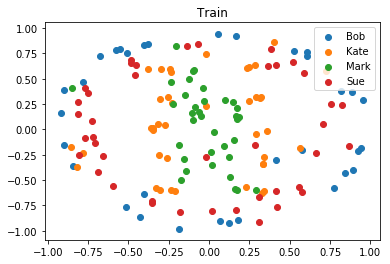

In [26]:
# 시각화!
groups = train.groupby("Competitor")
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.XCoord, group.YCoord,label=name)
ax.legend()
ax.set_title("Train")
plt.show()

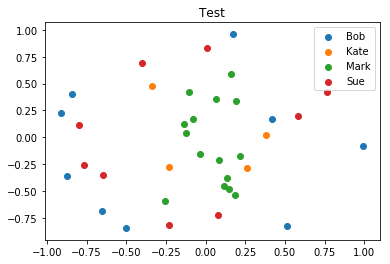

In [27]:
# 시각화!
groups = test.groupby("Competitor")
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.XCoord, group.YCoord,label=name)
ax.legend()
ax.set_title("Test")
plt.show()

In [28]:
# 데이터 정리 : knn  용하고 svm 용 하고 다르게 사용할 것이라서...
# knn_feature/label
train_data_knn = train.iloc[:, 1:len(train.columns)-1]
train_labels = train.iloc[:, len(train.columns)-1:]

In [29]:
test_data = test.iloc[:, 1:len(test.columns)-1]
test_labels = test.iloc[:,len(test.columns)-1:]

In [30]:
train_data_knn.head()

,XCoord,YCoord
0,0.943354,-0.184819
1,0.121557,-0.927656
2,0.818485,0.375437
3,0.867462,-0.159851
4,-0.817321,-0.373419


In [31]:
train_labels.head()

,Competitor
0,Bob
1,Bob
2,Bob
3,Sue
4,Kate


In [32]:
test_data.head()

,XCoord,YCoord
0,0.064729,0.356983
1,-0.766731,-0.255876
2,0.182282,-0.540976
3,-0.908910,0.223945
4,0.992230,-0.085550


In [33]:
test_labels.head()

,Competitor
0,Mark
1,Sue
2,Mark
3,Bob
4,Bob


* knn에서는 큰 상관이 없으나, svm에서는 각기 코드 이외에 전체 거리를 변수로 넣어서 처리하기 위해서임!!

In [34]:
# 그리고 하나의 거리에 관련된 추가 컬럼을 생성한다.
# lambda apply 를 이용해서 제곱거리 피처 추가 생성!!!
train["DistFromCenter"] = train[["XCoord","YCoord"]].apply(lambda x  : np.sqrt(sum(x**2)) ,axis=1   )
train.head()

,ID,XCoord,YCoord,Competitor,DistFromCenter
0,111,0.943354,-0.184819,Bob,0.961288
1,92,0.121557,-0.927656,Bob,0.935586
2,20,0.818485,0.375437,Bob,0.900483
3,75,0.867462,-0.159851,Sue,0.882067
4,10,-0.817321,-0.373419,Kate,0.898585


In [36]:
# 실제 계산 값하고 비교하면서 위의 컬럼이 제대로 생성되었는지 확인!!!
np.sqrt(train.iat[0,train.columns.get_loc("XCoord")]**2 + train.iat[0,train.columns.get_loc("YCoord")]**2)

0.9612879224419207

In [38]:
# 데이터 정리 : knn  용하고 svm 용 하고 다르게 사용할 것이라서...
# svm용 
train_data_svm = train.loc[:, ["XCoord","YCoord","DistFromCenter"]]
train_data_svm.head()

,XCoord,YCoord,DistFromCenter
0,0.943354,-0.184819,0.961288
1,0.121557,-0.927656,0.935586
2,0.818485,0.375437,0.900483
3,0.867462,-0.159851,0.882067
4,-0.817321,-0.373419,0.898585


In [40]:
# 데이터 분포 확인
# Method _ 02) 패키지 이용해서 처리
from scipy.stats import itemfreq
itemfreq(train_labels)

/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


array([['Bob', 33],
       ['Kate', 41],
       ['Mark', 35],
       ['Sue', 41]], dtype=object)

# KNN  
* 참고로 해당 데이터는 이미 위치의 특징으로 정규화가 되어 있어서 이 부분이 생략된 것임!!!

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [43]:
t1= time.time()
# Default k=5
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# Data Fitting
# 참고) numpy array type 에서 이상이 되어서 values.ravel() 로 처리하고 넘김!
# ref)https://stackoverflow.com/questions/29263099/dataconversionwarning-fitting-randomforestregressor-in-scikit
knn.fit(train_data_knn, train_labels.values.ravel())

# Data Prediction
pred = knn.predict(test_data)

t2 = time.time()
print ("Process Time : " + str(t2-t1))

# evaluate accuracy
print (accuracy_score(test_labels.values.ravel(), pred))

Process Time : 0.12117290496826172
0.7027027027027027


0.653462643678161
0.5876724137931035
0.4929166666666667
0.5073132183908047
0.4875
The optimal number of neighbors is 1


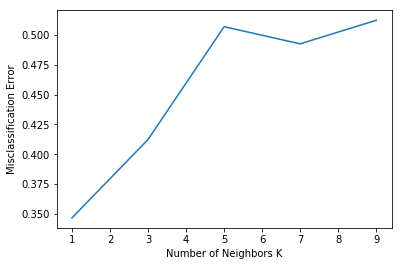

Process Time : 234.2775411605835


In [53]:
myList = list(range(1,10))

neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, train_data_knn, train_labels.values.ravel(), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print (scores.mean())

    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
t2 = time.time()
print ("Process Time : " + str(t2-t1))

* knn 으로 k=1 에서 0.69~70 정도의 정확도를 얻을 수 있음을 알 수 있음!!!!

## svm

In [54]:
from sklearn.svm import SVC

In [56]:
# 위에서와 달리 cv_score하고 그 당시의 parameter를 같이 가지고 있는 것이 필요함!!!
cv_scores = pd.DataFrame()
cv_scores = cv_scores.append({"param_c":0, "param_svm_cat":"", "score":0},ignore_index=True)
cnt = 0


# 주된 파라미터가 C의 값하고, 어떠한 커널을 사용하는지를 중심으로 튜닝!!!
# C: It is the regularization parameter, C, of the error term
cs= [0.01, 0.05, 0.1, 0.5, 1, 10,100 ]

for c in cs:
    # no-option, linear, poly2, rbf, sigmoid 
    clfs = [SVC(C=c), SVC(kernel='linear',C=c), SVC(kernel='poly',degree=2,C=c), SVC(kernel='poly',degree=3,C=c),SVC(kernel='rbf',gamma='auto',C=c), SVC(kernel='sigmoid',gamma='auto',C=c)]
    for clf in clfs:
        scores = cross_val_score(clf, train_data_svm, train_labels.values.ravel(), cv=5, scoring='accuracy')
        cv_scores.set_value(cnt, "param_c", c)
        cv_scores.set_value(cnt, "param_svm_cat", clf)
        cv_scores.set_value(cnt, "score", scores.mean())
        cnt += 1
#         cv_scores.append(scores.mean())
        print (str(scores.mean()) + ": Condtions" +  str(c)+":"+str(clf))


/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.

0.3470977011494253: Condtions0.01:SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.32728448275862065: Condtions0.01:SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.34663793103448276: Condtions0.01:SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.3462212643678161: Condtions0.01:SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_

/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib

0.34663793103448276: Condtions0.05:SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.3462212643678161: Condtions0.05:SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.3470977011494253: Condtions0.05:SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.32728448275862065: Condtions0.05:SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=

/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.

0.3470977011494253: Condtions0.1:SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.32728448275862065: Condtions0.1:SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.414080459770115: Condtions0.5:SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.47347701149425286: Condtions0.5:SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, r

/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib

0.46147988505747123: Condtions1:SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.3597844827586207: Condtions1:SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.360014367816092: Condtions1:SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.4610201149425287: Condtions1:SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_st

/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib

0.6535057471264368: Condtions10:SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.6278591954022988: Condtions10:SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.540646551724138: Condtions10:SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.6470258620689655: Condtions10:SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, ra

/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/minkyukwon/anaconda3/lib/python3.

In [57]:
# 해당 알고리즘에 대한 값이 길게 문자열로 들어가 있어서...
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

pd.options.display.max_rows = 4000

In [58]:
# 제일 좋은 값을 찾자!
cv_scores[cv_scores["score"]==max(cv_scores["score"])]

,param_c,param_svm_cat,score
38,100.0,"SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degre...",0.733822


In [75]:
# 최대 값의 parameter확인
idx = cv_scores[cv_scores["score"]==max(cv_scores["score"])].index
print (cv_scores.iloc[idx, cv_scores.columns.get_loc("param_svm_cat")])

38    SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degre...
Name: param_svm_cat, dtype: object


In [77]:
cv_scores.iloc[38, cv_scores.columns.get_loc("param_svm_cat")]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### To Do : 위의 각기 결과들을 가지고 Voting/ Logistic etc...